In [1]:
#Regression project 

In [2]:
#importing libraries
import numpy as np
import pandas as pd 
import matplotlib.pyplot as plt
import seaborn as sns
from sklearn.model_selection import train_test_split
from sklearn.ensemble import RandomForestRegressor
from sklearn import metrics 

In [3]:
gold_data = pd.read_csv("price_data.csv")

In [4]:
gold_data.head()

,Date,SPX,GLD,USO,SLV,EUR/USD
0,01-02-2008,1447.160034,84.860001,78.470001,15.180,1.471692
1,01-03-2008,1447.160034,85.570000,78.370003,15.285,1.474491
2,01-04-2008,1411.630005,85.129997,77.309998,15.167,1.475492
3,01-07-2008,1416.180054,84.769997,75.500000,15.053,1.468299
4,01-08-2008,1390.189941,86.779999,76.059998,15.590,1.557099


In [5]:
gold_data.tail()

,Date,SPX,GLD,USO,SLV,EUR/USD
2285,05-08-2018,2671.919922,124.589996,14.0600,15.5100,1.186789
2286,05-09-2018,2697.790039,124.330002,14.3700,15.5300,1.184722
2287,05-10-2018,2723.070068,125.180000,14.4100,15.7400,1.191753
2288,5/14/2018,2730.129883,124.489998,14.3800,15.5600,1.193118
2289,5/16/2018,2725.780029,122.543800,14.4058,15.4542,1.182033


In [6]:
gold_data.shape

(2290, 6)

In [7]:
gold_data.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 2290 entries, 0 to 2289
Data columns (total 6 columns):
 #   Column   Non-Null Count  Dtype  
---  ------   --------------  -----  
 0   Date     2290 non-null   object 
 1   SPX      2290 non-null   float64
 2   GLD      2290 non-null   float64
 3   USO      2290 non-null   float64
 4   SLV      2290 non-null   float64
 5   EUR/USD  2290 non-null   float64
dtypes: float64(5), object(1)
memory usage: 107.5+ KB


In [8]:
gold_data.isnull().sum()

Date       0
SPX        0
GLD        0
USO        0
SLV        0
EUR/USD    0
dtype: int64

In [9]:
gold_data.describe()

,SPX,GLD,USO,SLV,EUR/USD
count,2290.000000,2290.000000,2290.000000,2290.000000,2290.000000
mean,1654.315776,122.732875,31.842221,20.084997,1.283653
std,519.111540,23.283346,19.523517,7.092566,0.131547
min,676.530029,70.000000,7.960000,8.850000,1.039047
25%,1239.874969,109.725000,14.380000,15.570000,1.171313
50%,1551.434998,120.580002,33.869999,17.268500,1.303297
75%,2073.010070,132.840004,37.827501,22.882500,1.369971
max,2872.870117,184.589996,117.480003,47.259998,1.598798


In [17]:
correlation = gold_data.select_dtypes(include='number').corr()


In [18]:
#creating an heatmap to understand the correlation 

<Axes: >

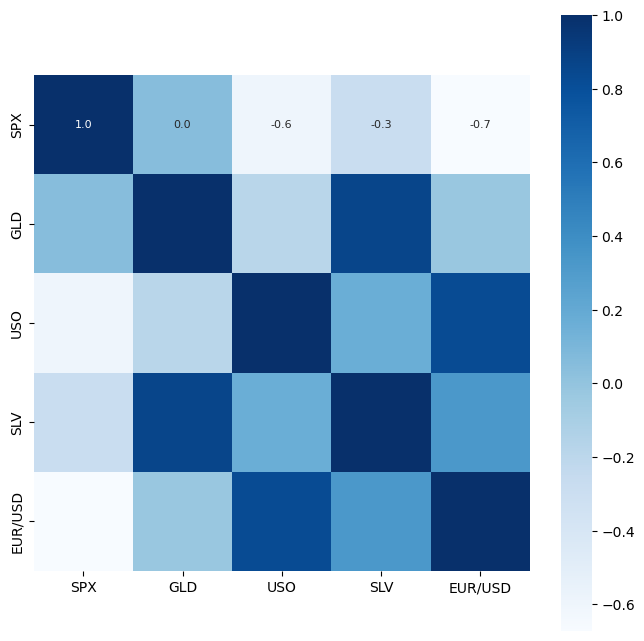

In [22]:
plt.figure(figsize = (8,8))
sns.heatmap(correlation, cbar=True, square=True, fmt='.1f',annot=True, annot_kws={'size': 8}, cmap='Blues')

In [23]:
#correlation values of gold 
print(correlation['GLD'])

SPX        0.049345
GLD        1.000000
USO       -0.186360
SLV        0.866632
EUR/USD   -0.024375
Name: GLD, dtype: float64


/opt/conda/envs/anaconda-2024.02-py310/lib/python3.10/site-packages/seaborn/_oldcore.py:1119: FutureWarning: use_inf_as_na option is deprecated and will be removed in a future version. Convert inf values to NaN before operating instead.
  with pd.option_context('mode.use_inf_as_na', True):


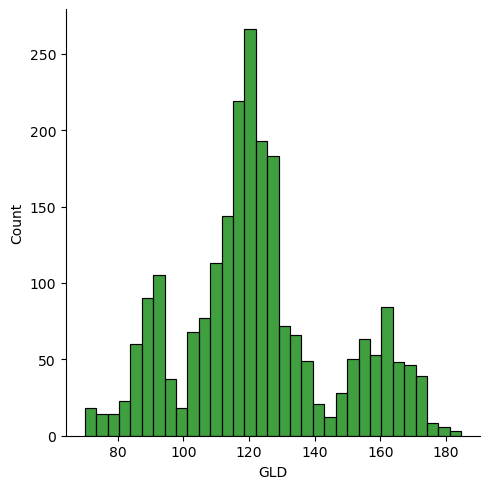

In [33]:
#checking the distribution of the gold price
sns.displot(gold_data['GLD'], color='green')

In [34]:
#splitting the features and target 

In [35]:
x = gold_data.drop(['Date','GLD'],axis=1)
y = gold_data['GLD']

In [36]:
print(x)

              SPX        USO      SLV   EUR/USD
0     1447.160034  78.470001  15.1800  1.471692
1     1447.160034  78.370003  15.2850  1.474491
2     1411.630005  77.309998  15.1670  1.475492
3     1416.180054  75.500000  15.0530  1.468299
4     1390.189941  76.059998  15.5900  1.557099
...           ...        ...      ...       ...
2285  2671.919922  14.060000  15.5100  1.186789
2286  2697.790039  14.370000  15.5300  1.184722
2287  2723.070068  14.410000  15.7400  1.191753
2288  2730.129883  14.380000  15.5600  1.193118
2289  2725.780029  14.405800  15.4542  1.182033

[2290 rows x 4 columns]


In [37]:
print(y)

0        84.860001
1        85.570000
2        85.129997
3        84.769997
4        86.779999
           ...    
2285    124.589996
2286    124.330002
2287    125.180000
2288    124.489998
2289    122.543800
Name: GLD, Length: 2290, dtype: float64


In [38]:
x_train, x_test, y_train, y_test = train_test_split(x, y, test_size=0.2, random_state=2)

In [40]:
regressor = RandomForestRegressor(n_estimators=100)

In [41]:
regressor.fit(x_train, y_train)

RandomForestRegressor()

In [42]:
#predict the test data

In [43]:
test_data_prediction = regressor.predict(x_test)

In [44]:
print(test_data_prediction)

[168.62079943  81.99639981 115.84730029 127.55670064 120.7851017
 154.7086981  150.40649807 126.10080018 117.5522986  125.92230091
 116.61130126 172.31670072 142.00459824 167.60319763 115.32480006
 117.70200027 138.22630357 170.31010102 159.19890268 160.07029914
 155.08049967 125.11079995 175.9276992  157.25920336 125.23870067
  93.81209979  77.15709991 120.76560008 119.06589922 167.39689909
  88.27710059 125.14650015  91.42670082 117.80040011 121.18969917
 136.58950079 115.51510167 115.1484008  146.80370042 107.1686008
 103.88140222  87.19509792 126.43420041 117.92970037 152.67899889
 119.56130001 108.29920001 108.20199839  93.15140047 127.16929761
  74.84760028 113.54209919 121.26830011 111.43819912 118.88199916
 120.41819951 158.97770042 168.5449016  146.92989699  85.84909866
  94.36140056  86.70449905  90.66700038 118.88300085 126.44430061
 127.50820037 169.42600028 122.20989911 117.37639925  98.64219994
 168.2323015  142.76599876 132.37750292 121.26530218 121.36939942
 119.8283005

In [45]:
#R squared error 

In [47]:
error_score = metrics.r2_score(y_test, test_data_prediction)
print("R squared error : ", error_score)

R squared error :  0.9898920884785531


In [48]:
y_test = list(y_test)

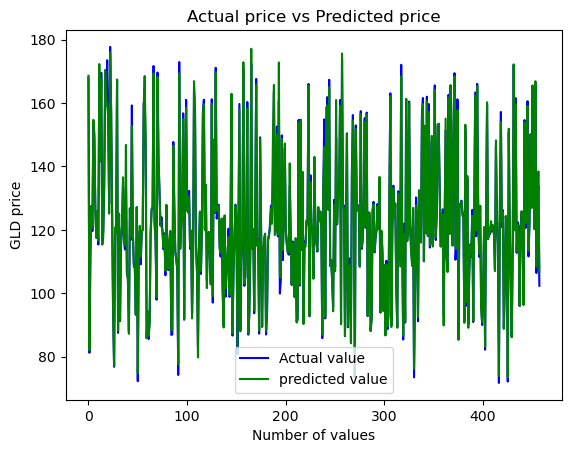

In [49]:
plt.plot(y_test, color='blue', label = 'Actual value')
plt.plot(test_data_prediction, color='green', label='predicted value')
plt.title('Actual price vs Predicted price')
plt.xlabel('Number of values')
plt.ylabel('GLD price')
plt.legend()
plt.show()